<a href="https://colab.research.google.com/github/hechen2020/19ma573HuixinChen/blob/master/src/hw_mc_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

- Desgin a python function pi_mc(N, m) with
  - Input: Two integer numbers $N$ and $m$
  - Output: An array of length $m$, where all componets are independent, and computed from ordinary monte carlo method for $\pi$ with $N$ simulations (random shots).
- For $N \in \{2^n: n = 5, \ldots, 10\}$: Run pi_mc(N, 100) and find its variance
- Plot log-log chart for $N \to RMSE(N)$ using the array above and find convergence rate
- Can you propose a deterministic approximation to $\pi$?

In [0]:
import numpy as np
from scipy import stats
from scipy.stats import norm
import matplotlib.pyplot as plt
import seaborn as sns
import array

In [0]:
def pi_mc(N,m):
  #area of the bounding box
  box_area = 4.0
  
  #number of samples
  N_total = N

  #creating a new array
  arr = array.array('f', [])
  
  for i in range(0,m):
    #drawing random points uniform between -1 and 1
    X = np.random.uniform(low=-1, high=1, size=N_total)
    Y = np.random.uniform(low=-1, high=1, size=N_total)
    
    # calculate the distance of the point from the center 
    distance = np.sqrt(X**2+Y**2);
    # check if point is inside the circle    
    is_point_inside = distance<1.0
    
    # sum up the hits inside the circle
    N_inside=np.sum(is_point_inside)
    
    # estimate the circle area
    circle_area = box_area * N_inside/N_total
    
    arr.append(circle_area)
    
  return arr



In [62]:
print(pi_mc(2**5,100))
print(np.var(pi_mc(2**5,100)))
print(pi_mc(2**6,100))
print(np.var(pi_mc(2**6,100)))
print(pi_mc(2**7,100))
print(np.var(pi_mc(2**7,100)))
print(pi_mc(2**8,100))
print(np.var(pi_mc(2**8,100)))
print(pi_mc(2**9,100))
print(np.var(pi_mc(2**9,100)))
print(pi_mc(2**10,100))
print(np.var(pi_mc(2**10,100)))

array('f', [3.125, 2.875, 3.25, 3.0, 3.125, 3.125, 3.375, 3.125, 3.25, 2.5, 2.75, 3.25, 3.0, 2.5, 3.375, 3.75, 3.5, 3.625, 3.125, 3.625, 2.5, 2.875, 3.25, 3.0, 3.0, 3.5, 3.125, 2.875, 2.875, 3.375, 3.875, 3.25, 3.125, 2.625, 3.375, 3.0, 3.125, 3.5, 3.375, 2.75, 3.0, 3.375, 3.75, 2.75, 2.625, 3.0, 3.125, 2.625, 3.0, 2.5, 2.75, 3.5, 3.375, 3.25, 3.125, 3.0, 2.875, 2.75, 3.125, 3.0, 3.25, 3.5, 3.375, 3.0, 3.75, 3.125, 2.875, 3.5, 3.25, 3.25, 3.25, 2.5, 3.25, 3.375, 2.875, 3.375, 2.75, 2.75, 3.25, 3.25, 3.5, 2.875, 2.375, 3.25, 3.125, 3.0, 3.25, 3.125, 3.375, 3.75, 3.125, 3.5, 2.75, 2.75, 3.5, 3.375, 2.875, 3.0, 3.625, 3.625])
0.092704676
array('f', [3.5625, 2.9375, 3.0, 3.0625, 3.1875, 3.1875, 2.875, 3.0625, 3.0625, 3.25, 3.4375, 2.75, 3.1875, 3.125, 2.8125, 3.0, 3.375, 3.3125, 2.8125, 3.5, 2.875, 3.3125, 3.0625, 3.1875, 3.1875, 3.0, 3.5, 3.0625, 3.25, 3.0, 2.6875, 3.375, 3.4375, 2.8125, 2.9375, 3.125, 3.125, 3.1875, 3.25, 3.0, 2.75, 3.0, 3.0625, 3.375, 3.0625, 2.6875, 2.875, 2.9375, 3.56

array('i', [32, 64, 128, 256, 512, 1024])
array('f', [0.272601455450058, 0.1908227503299713, 0.13086220622062683, 0.10144486278295517, 0.06993988156318665, 0.049859289079904556])


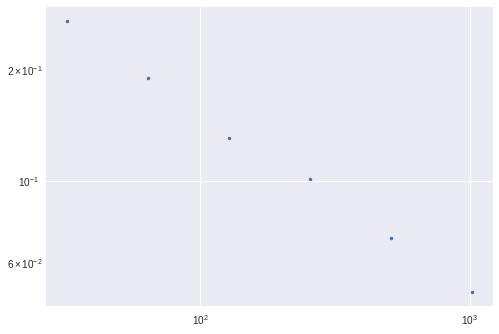

In [63]:
#for each value of N, calculate the RMSE of of pi_mc(N,100): taking in N, change to an array and output a float
def rmse(N):
  arr_mc = pi_mc(N,100)# output an array as above
  arr_sqerr = array.array('f',[])
  for i in range(len(arr_mc)):
    sq_err = (arr_mc[i]-np.pi)**2# for each element in arr_mc, return the sqr of error
    arr_sqerr.append(sq_err)
  return np.sqrt(np.mean(arr_sqerr))# return the sqrt of the mean of all error


arrN = array.array('i', [2**5, 2**6, 2**7, 2**8, 2**9, 2**10])
arr_err = array.array('f', [])
for i in range(len(arrN)):
  arr_err.append(rmse(arrN[i]))
print(arrN)
print(arr_err)
plt.loglog(arrN,arr_err,'.')

In [64]:
import scipy.stats as ss
out = ss.linregress(arrN,arr_err)
print('----->>>the convergence rate is ' + str(-out[0]))

----->>>the convergence rate is 0.00017143210901547152


##Deterministic approach

One deterministic approach is to calculate the series of 

$$\frac{\pi}{4}=1-\frac{1}{3}+\frac{1}{5}-\frac{1}{7}+\frac{1}{9}-...$$

this is derived from the Taylor series for $arctan(x)$, which is

$$arctan(x)=x-\frac{x^3}{3}+\frac{x^5}{5}-\frac{x^7}{7}+\frac{x^9}{9}-...$$

and as we know that $arctan(1)=\frac{\pi}{4}$, so if we let $x=1$, we get the above series to deterministically approximate $\pi$